In [1]:
import scanpy as sc

In [2]:
adata = sc.read('brain_qc.h5ad')

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\anndata\__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
?sc.pl.pca_overview

Signature: sc.pl.pca_overview(adata: anndata._core.anndata.AnnData, **params)
Docstring:
Plot PCA results.

The parameters are the ones of the scatter plot. Call pca_ranking separately
if you want to change the default settings.

Parameters
----------
adata : AnnData
    Annotated data matrix.
color
    Keys for observation/cell annotation either as list `["ann1", "ann2"]` or
    string `"ann1,ann2,..."`.
use_raw
    Use `raw` attribute of `adata` if present.
sort_order
    For continuous annotations used as color parameter, plot data points
    with higher values on top of others.
groups
    Restrict to a few categories in categorical observation annotation.
    The default is not to restrict to any groups.
dimensions
    0-indexed dimensions of the embedding to plot as integers. E.g. [(0, 1), (1, 2)].
    Unlike `components`, this argument is used in the same way as `colors`, e.g. is
    used to specify a single plot at a time. Will eventually replace the components
    argument.
com

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


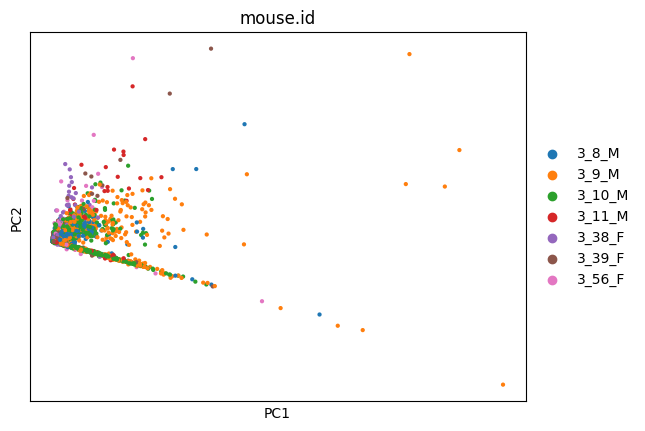

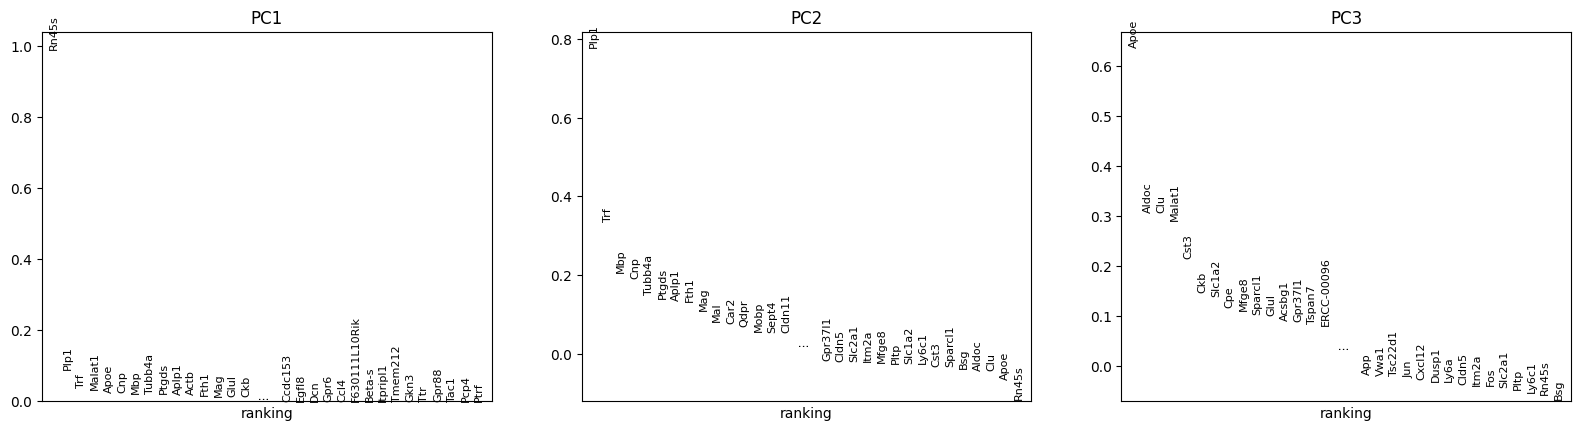

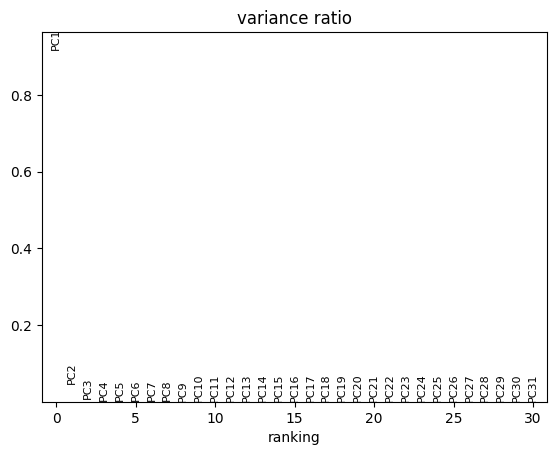

In [4]:
sc.pp.pca(adata)
sc.pl.pca_overview(adata, color='mouse.id')

In [5]:
adata_cpm = adata.copy()
adata_cpm.raw = adata_cpm
sc.pp.normalize_total(adata_cpm, target_sum=1e6)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


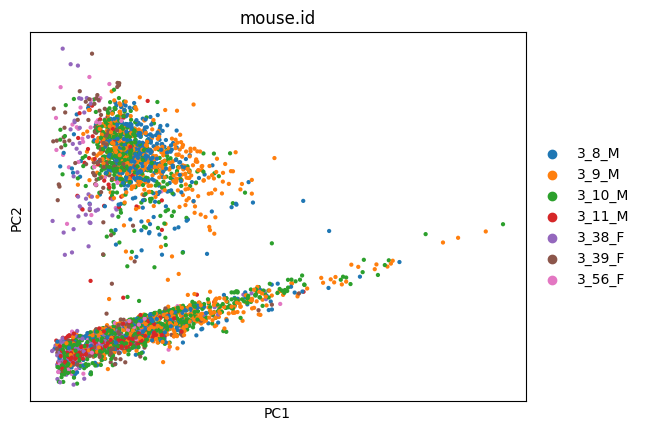

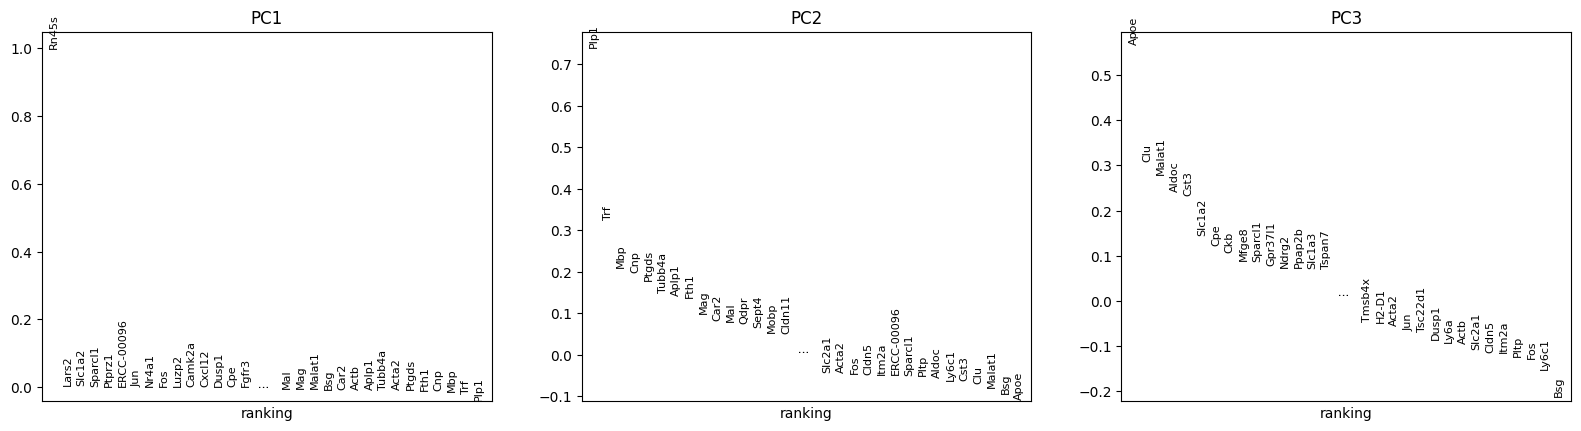

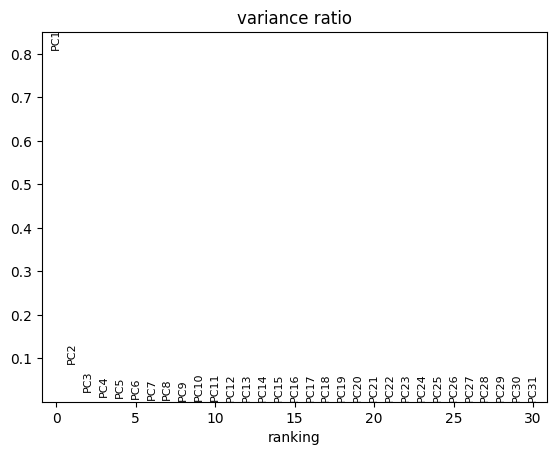

In [6]:
sc.pp.pca(adata_cpm)
sc.pl.pca_overview(adata_cpm, color='mouse.id')

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


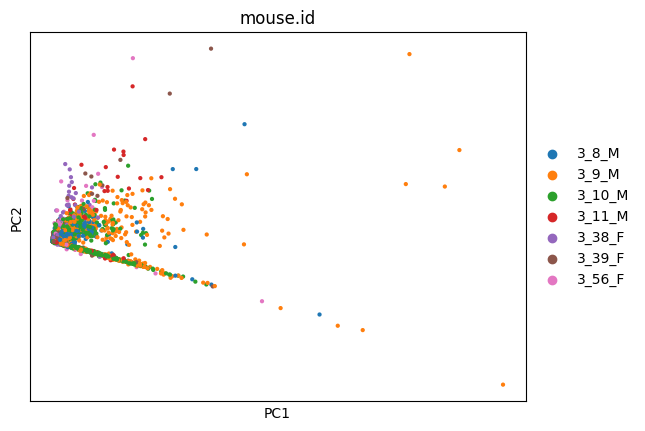

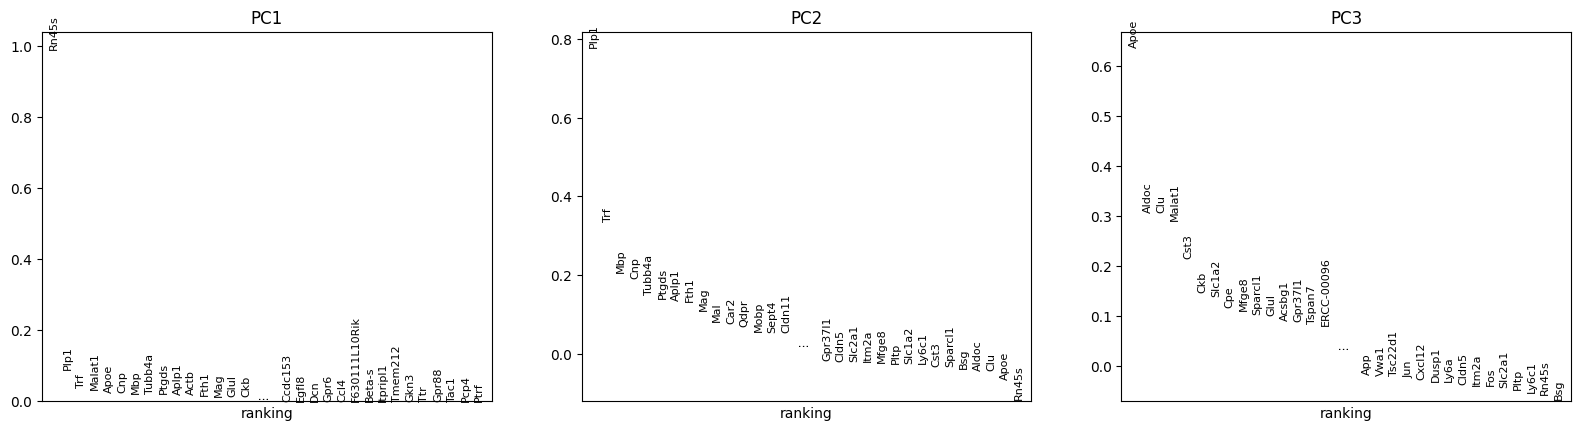

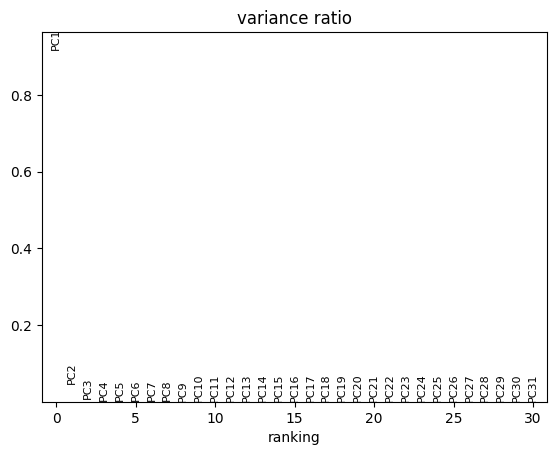

In [7]:
adata_cpm_ex = adata.copy()
sc.pp.normalize_total(adata_cpm_ex, target_sum=1e6, exclude_highly_expressed=True)

sc.pp.pca(adata_cpm)
sc.pl.pca_overview(adata_cpm_ex, color='mouse.id')


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\preprocessing\_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


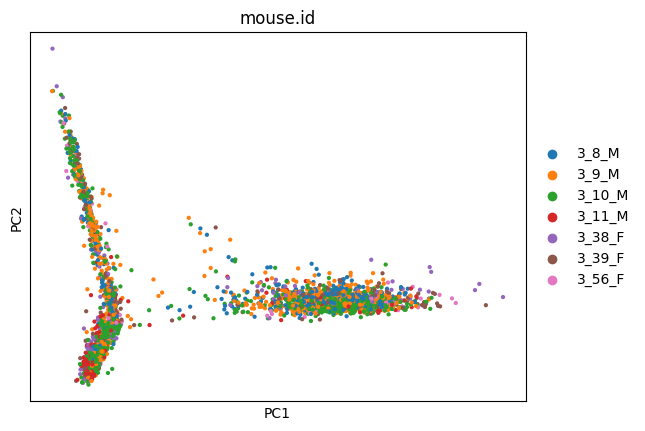

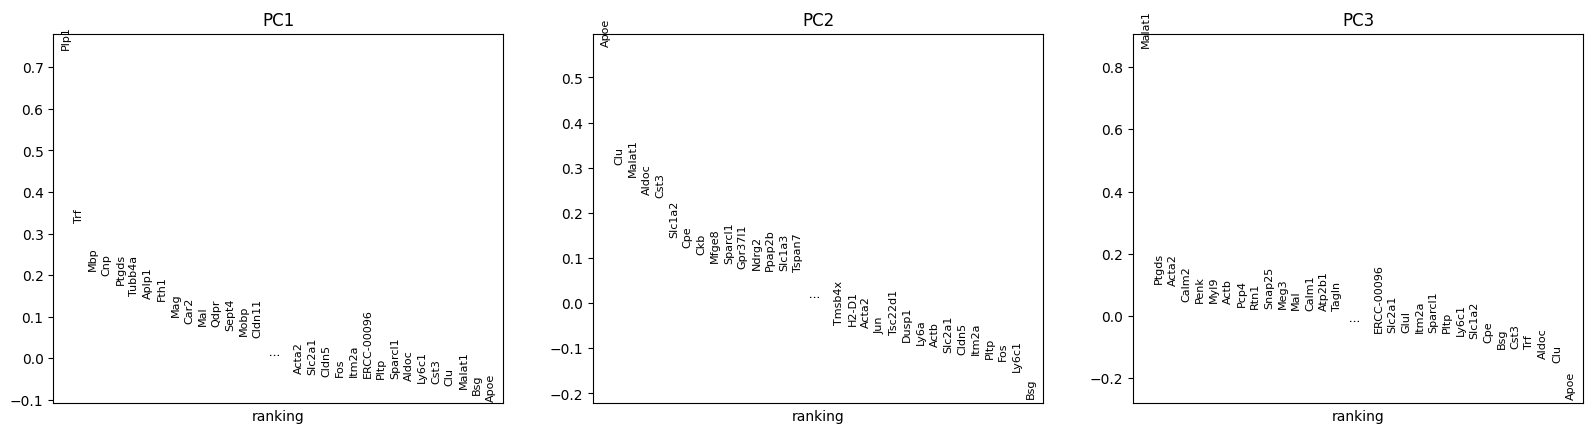

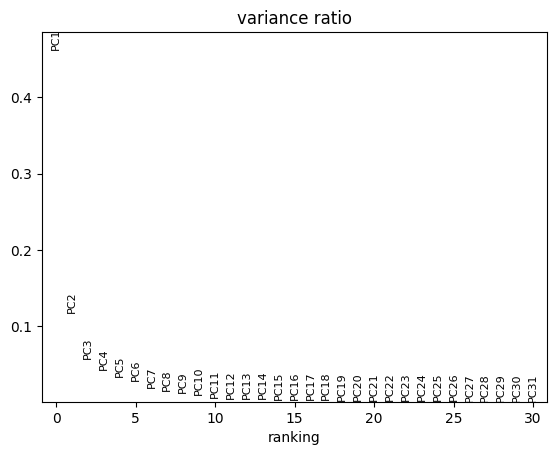

In [8]:
not_Rn45s = adata_cpm.var.index != 'Rn45s'
adata_no_Rn45s = adata_cpm[:, not_Rn45s]

sc.pp.pca(adata_no_Rn45s)
sc.pl.pca_overview(adata_no_Rn45s, color='mouse.id')

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


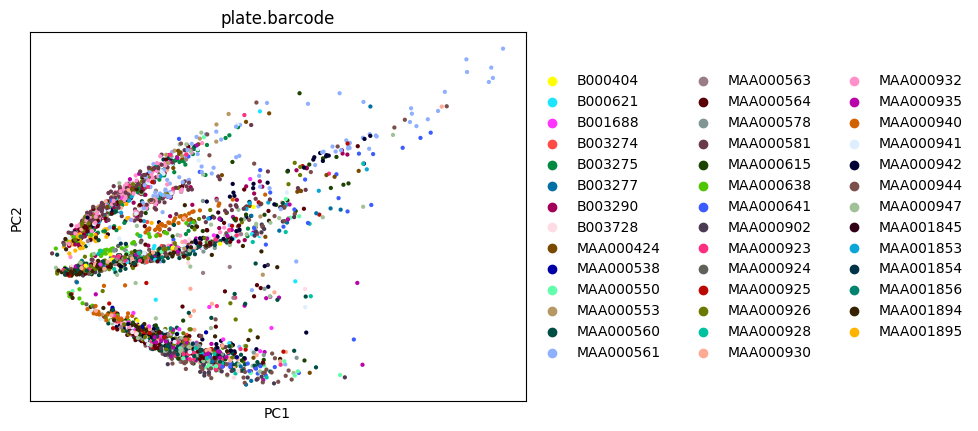

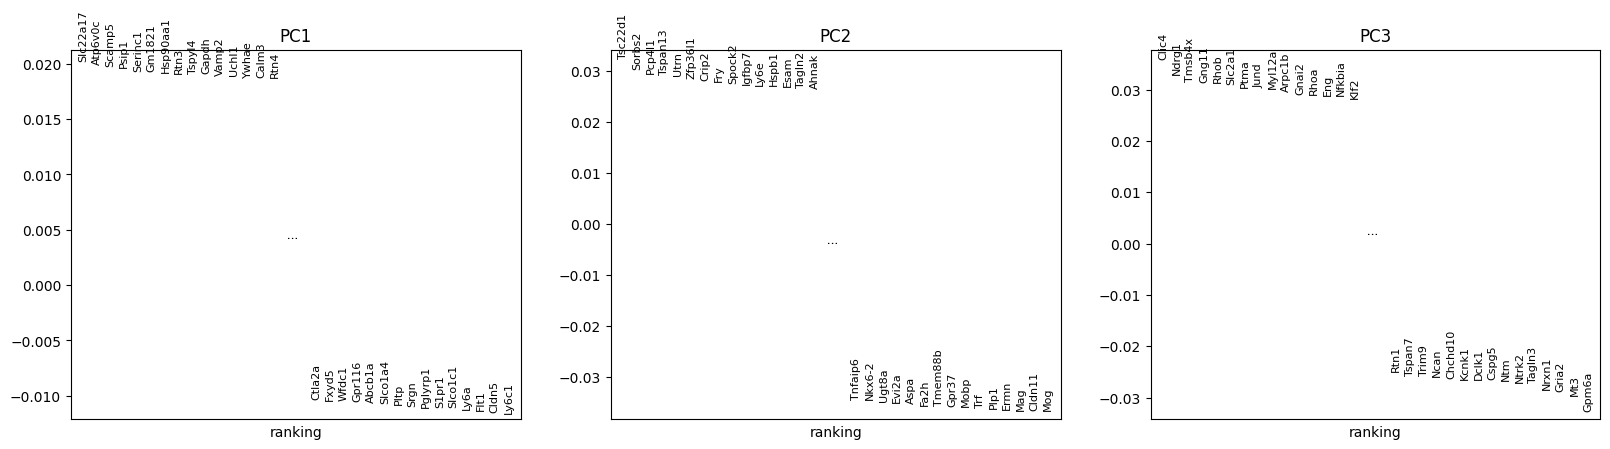

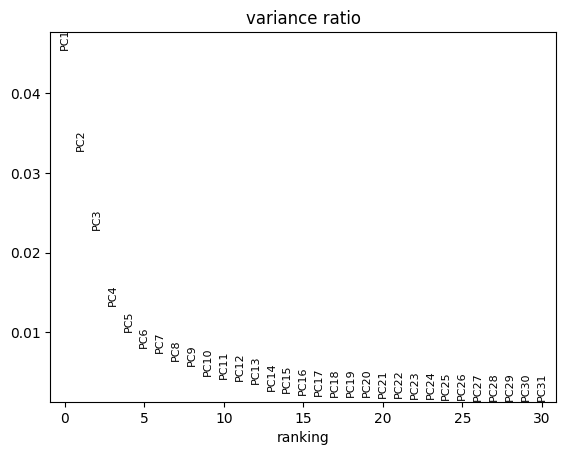

In [13]:
sc.pp.log1p(adata)
sc.pp.scale(adata)

sc.pp.pca(adata)
sc.pl.pca_overview(adata, color='plate.barcode')

In [14]:
adata.write('brain_normalized.h5ad')